In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from data_preprocessing_final2 import *

In [ ]:
#set columns
pd.set_option("display.max_columns",None)

#set rows
pd.set_option("display.max_rows",None)

### read our file and clean, re-classify, train/test split, and scale our data 

In [3]:
# read our original data file
data = pd.read_csv('./data/Ames_Housing_Price_Data.csv', index_col=0)

In [4]:
# taking only Normal Sale conditions to make apples to apples comparison for Sales Price (majority were Normal)
data = data[data['SaleCondition'] == 'Normal']

In [5]:
# this function will clean, dummify/ord, test/train split, and scale all our data
train_data_linear, train_target_linear, test_data_linear, test_target_linear, train_data_tree, train_target_tree, test_data_tree, test_target_tree = initiate_data(data)

### Checking our new train/test target and feature variables
- take out the PID so we can run our boosting models

In [6]:
train_data_linear.head()

,PID,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_Reg,LandContour_HLS,LandContour_Low,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,TotalBath,Bsmt_Unfin_Ratio,TotalLivArea
0,527325110,0,0,0,0,1,0,1,0,0,...,0.719298,0.393805,0.000000,0.000000,0.000000,0.0,0.563265,0.250000,1.000000,0.400886
1,534129370,0,0,0,0,1,0,1,0,0,...,0.649123,0.370206,0.219101,0.019298,0.000000,0.0,0.000000,0.250000,0.456522,0.375779
2,534451110,0,0,0,0,1,0,0,0,0,...,0.482456,0.259587,0.000000,0.000000,0.245059,0.0,0.000000,0.166667,0.739069,0.258943
3,903401070,0,0,0,0,1,0,1,0,0,...,0.719298,0.424779,0.000000,0.094737,0.142292,0.0,0.000000,0.000000,1.000000,0.297013
4,534176250,0,0,0,0,1,0,1,0,0,...,0.649123,0.389381,0.000000,0.000000,0.000000,0.0,0.000000,0.083333,1.000000,0.327207


In [7]:
train_data_linear.shape

(1926, 236)

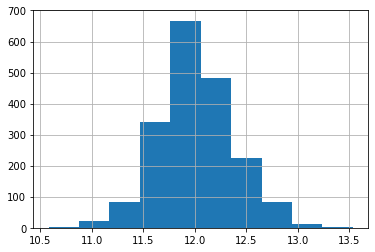

In [8]:
train_target_tree.hist()

In [9]:
# need to delete PID to run the Regression models
del train_data_tree['PID']
del test_data_tree['PID']

# model was built out using these variables so going to redefine our 
# train_data_linear, train_target_linear, test_data_linear, test_target_linear
x_train = train_data_tree
Y_train = train_target_tree

x_test = test_data_tree
Y_test = test_target_tree

### Attempt on Gradient Boosting

In [11]:
gbm = GradientBoostingRegressor()

In [29]:
## let's setup some basic parameters
learning_rate=0.001
max_depth=4

gbm.set_params(learning_rate=learning_rate, n_estimators=10000, max_depth=max_depth)

GradientBoostingRegressor(learning_rate=0.001, max_depth=4, n_estimators=10000)

In [13]:
gbm.fit(x_train,Y_train)

GradientBoostingRegressor(learning_rate=0.001, max_depth=4, n_estimators=10000)

In [17]:
print("The score for train: ", gbm.score(x_train,Y_train))
print("The score for test: ", gbm.score(x_test,Y_test))

The score for train:  0.9761028117115509
The score for test:  0.9361917654194201


In [27]:
feature_importance = pd.Series(gbm.feature_importances_, index=x_train.columns).sort_values(ascending=False)
print(feature_importance)

TotalLivArea        0.485691
OverallQual         0.199031
TotalBath           0.055613
ExterQual           0.036758
GarageArea          0.031443
YearBuilt           0.025070
YearRemodAdd        0.024206
OverallCond         0.019440
Fireplaces          0.018344
KitchenQual         0.017833
LotArea             0.016877
CentralAir          0.012229
GarageType          0.006403
Neighborhood        0.004922
BsmtFinType1        0.003970
GarageYrBlt         0.003724
ExterCond           0.003625
MSZoning            0.003594
MSSubClass          0.003569
Bsmt_Unfin_Ratio    0.003053
Condition1          0.002604
LotFrontage         0.002309
BsmtQual            0.002254
MasVnrArea          0.001930
Functional          0.001888
WoodDeckSF          0.001539
PavedDrive          0.001505
ScreenPorch         0.000978
BsmtExposure        0.000949
OpenPorchSF         0.000915
BedroomAbvGr        0.000913
Exterior1st         0.000698
TotRmsAbvGrd        0.000647
EnclosedPorch       0.000634
MasVnrType    

### Using GridSearch with Gradient Boosting

In [48]:
# setting our parameters up for Grid
paramDict = {'learning_rate': [0.01,0.1,0.2],
             'n_estimators': [10000], 
             'max_depth': list(range(1,3))}

In [55]:
grid = GridSearchCV(gbm, paramDict, cv=2)
grid.fit(x_train,Y_train)

GridSearchCV(cv=2,
             estimator=GradientBoostingRegressor(learning_rate=0.001,
                                                 max_depth=4,
                                                 n_estimators=10000),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [10000]})

In [56]:
grid.best_params_

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 10000}

In [57]:
print("The score for train: ", grid.score(x_train,Y_train))
print("The score for test: ", grid.score(x_test,Y_test))

The score for train:  0.9805940101449411
The score for test:  0.9390077934119152
